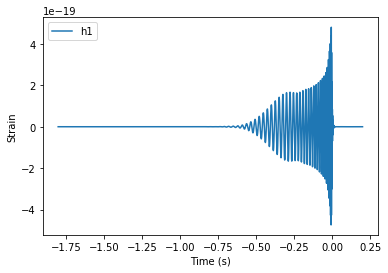

In [22]:
#--------------#Import the packages we need--------------#
import matplotlib.pyplot as plt  # Import figure plot package
from pycbc.waveform import get_td_waveform # Import the time domain waveform generation function from PyCBC
#--------------------#Import over-----------------------#


#--------------#Generate the time series waveform#--------------#
hp, hc = get_td_waveform(approximant='IMRPhenomPv2', # Use a Post-Neutonian approximant -- IMRPhenomPv2    
                         mass1=20, 
                         mass2=20,
                         spin1z=0.9,
                         spin2z=0.9,
                         delta_t=1.0/4096, # Sample frequency = 4096Hz
                         f_lower=40 # High pass filter
                         )
#--------------#Wavefrom generation over#----------------------#


#----------Plot the time series figure--------------#
plt.plot(hp.sample_times, # X cordinate: Sample time
         hp, # Y cordinate: Amplitude of plus polarization
         label='h1'
         )
plt.ylabel('Strain')
plt.xlabel('Time (s)')
plt.legend()
plt.show()
#----------------------Plot over------------------------------#

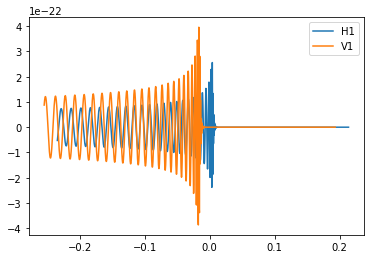

In [2]:
from pycbc.detector import Detector
from pycbc.waveform import get_td_waveform
import matplotlib.pyplot as plt 
import numpy as np

#GW source direction, polarization and inclination assignment
ra = 1.7 #Right_ascension
dec = 0 #Declination
pol = 0.2 #Polarization
inc = 0 #Inclination

h = Detector("H1") #Let h = LIGO Hanford
v = Detector("V1") #Let v = Virgo


# Generate a wavefrom
hp, hc = get_td_waveform(approximant="IMRPhenomPv2", mass1=10, mass2=10,
                         f_lower=30, delta_t=1.0/4096, inclination=inc,
                         distance=400)

hth = h.project_wave(hp, hc, ra, dec, pol) #Project waveform to LIGO Hanford
htv = v.project_wave(hp, hc, ra, dec, pol) #Project waveform to Virgo

plt.plot(np.array(hth.sample_times[31000:]), np.array(hth[31000:]), label = 'H1')
plt.plot(np.array(htv.sample_times[31000:]), np.array(htv[31000:]), label = 'V1')
plt.legend()
plt.show()

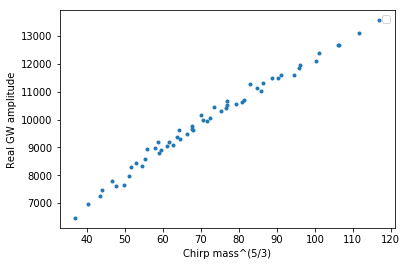

In [13]:
import pylab
from pycbc import waveform
import numpy as np
import matplotlib.pyplot as plt
mass1 = np.linspace(10,20,10)
mass2 = np.linspace(10,20,10)
real_h = []
est_h = []
for i in range(len(mass1)):
    for j in range(len(mass2)):
        if mass1[i]<=mass2[j]:
            hp, hc = waveform.get_td_waveform(approximant='IMRPhenomPv2',
                                 distance  = 3.2408e-23, #1 meter
                                 mass1=mass1[i], mass2=mass2[j],
                                 delta_t=1.0/4096,
                                 f_lower=40)
            signal_h1 = hp
            signal_h1_array = np.array(signal_h1)
            list_h1 = signal_h1_array.tolist()
            h1_max_index = list_h1.index(max(list_h1))
        
            chirp_mass = (mass1[i] * mass2[j])**(0.6) / (mass1[i] + mass2[j])**(0.2)
            est_h.append((chirp_mass**(1.66666667)))
            real_h.append(signal_h1_array[h1_max_index])
        
plt.ylabel('Real GW amplitude')
plt.xlabel('Chirp mass^(5/3)')
plt.legend()
plt.plot(est_h,real_h,'.')

In [43]:
from pycbc.detector import Detector, get_available_detectors

# We can list the available detectors. This gives their detector abbreviation
# along with a longer name. Note that some of these are not physical detectors
# but may be useful for testing or study purposes

for abv, detector in get_available_detectors():
    d = Detector(abv)

    # Note that units are all in radians
    print("{} {} Latitude {} Longitude {}".format(detector, abv,
                                                  d.latitude,
                                                  d.longitude))


GEO_600 G1 Latitude 0.91184982752 Longitude 0.17116780435
ALLEGRO_320 A1 Latitude 0.53079879206 Longitude -1.59137068496
LHO_4k H1 Latitude 0.81079526383 Longitude -2.08405676917
TAMA_300 T1 Latitude 0.62267336022 Longitude 2.43536359469
VIRGO_CITF V0 Latitude 0.76151183984 Longitude 0.18333805213
VIRGO V1 Latitude 0.76151183984 Longitude 0.18333805213
ET3_T1400308 E3 Latitude 0.76270463257 Longitude 0.1819299673
EXPLORER X1 Latitude 0.81070543755 Longitude 0.10821041362
CIT_40 C1 Latitude 0.59637900541 Longitude -2.06175744538
KAGRA K1 Latitude 0.6355068497 Longitude 2.396441015
ET2_T1400308 E2 Latitude 0.7629930799 Longitude 0.1840585887
ET0_T1400308 E0 Latitude 0.76270463257 Longitude 0.1819299673
LIO_4k I1 Latitude 0.248418530201 Longitude 1.33401332494
ET1_T1400308 E1 Latitude 0.76151183984 Longitude 0.18333805213
ACIGA U1 Latitude 0.0 Longitude 0.0
AURIGA O1 Latitude 0.79156499342 Longitude 0.20853775679
NIOBE B1 Latitude -0.5573418078 Longitude 2.02138216202
LHO_2k H2 Latitude 0

In [10]:
from math import radians, cos, sin, asin, sqrt

def distance(lat1,lng1,lat2,lng2):
    dlon=lng2-lng1
    dlat=lat2-lat1
    a=sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    distance=2*asin(sqrt(a))*6371 # Earth radius is 6371km
    distance=round(distance,3)
    return distance

print('Distance bteween H1 and L1 is: ' + str(distance(0.81079526383,-2.08405676917,0.53342313506,-1.58430937078))+ 'km')
#print('Light traveling time between H1 and L1 is: '+ str(distance(0.81079526383,-2.08405676917,0.53342313506,-1.58430937078)/299792.458)+' seconds')
print('Distance bteween H1 and V1 is: ' + str(distance(0.81079526383,-2.08405676917,0.76151183984,0.18333805213)) + 'km')
#print('Light traveling time between H1 and K1 is: '+ str(distance(0.81079526383,-2.08405676917,0.6355068497,2.396441015)/299792.458) +' seconds')


Distance bteween H1 and L1 is: 3027.088km
Distance bteween H1 and V1 is: 8853.078km


In [14]:
from pycbc.detector import Detector

for ifo1 in ['H1']:
    for ifo2 in ['L1', 'V1']:
            dt = Detector(ifo1).light_travel_time_to_detector(Detector(ifo2))
            print("Direct Time from {} to {} is {} seconds".format(ifo1, ifo2, dt))

Direct Time from H1 to L1 is 0.0100128461522 seconds
Direct Time from H1 to V1 is 0.0272879799338 seconds


In [15]:
v_GW_hl = 3027.088*1000/0.0100128461522
v_GW_hk = 8853.078*1000/0.0272879799338
print(v_GW_hl,v_GW_hk)

(302320434.5684364, 324431417.110294)


In [ ]:
####Frequency considered#########
import pylab
from pycbc import waveform
import numpy as np
import matplotlib.pyplot as plt
mass1 = np.linspace(10,50,40)
mass2 = np.linspace(10,50,40)
real_h = []
est_h = []
for i in range(len(mass1)):
    for j in range(len(mass2)):
      if mass1[i]<=mass2[j]:
        hp, hc = waveform.get_td_waveform(approximant='IMRPhenomPv2',
                                 mass1=mass1[i], mass2=mass2[j],
                                 delta_t=1.0/4096,
                                 f_lower=40)
        signal_h1 = hp
        signal_h1_array = np.array(signal_h1)
        list_h1 = signal_h1_array.tolist()
        h1_max_index = list_h1.index(max(list_h1))

        hp, hc = hp.trim_zeros(), hc.trim_zeros()
        amp = waveform.utils.amplitude_from_polarizations(hp, hc)
        f = waveform.utils.frequency_from_polarizations(hp, hc)
        
        f_array = np.array(f)
        f_list = f_array.tolist()
        max_f_list = max(f_list)

        chirp_mass = (mass1[i] * mass2[j])**(0.6) / (mass1[i] + mass2[j])**(0.2)
        max_frequency = f[h1_max_index]
        #est_h.append((chirp_mass**(0.8333333))*(max_frequency**(-0.16666667)))
        #est_h.append((chirp_mass**(1.66666667))*(max_frequency**(0.66666667)))
        est_h.append((chirp_mass**(1.66666667)))

        real_h.append(signal_h1_array[h1_max_index])

plt.plot(real_h,est_h,'.')

In [5]:
from pycbc.detector import Detector, get_available_detectors

# We can list the available detectors. This gives their detector abbreviation
# along with a longer name. Note that some of these are not physical detectors
# but may be useful for testing or study purposes

for abv, detector in get_available_detectors():
    d = Detector(abv)
print(get_available_detectors)

<function get_available_detectors at 0x7f85954e4140>


/home/liu/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


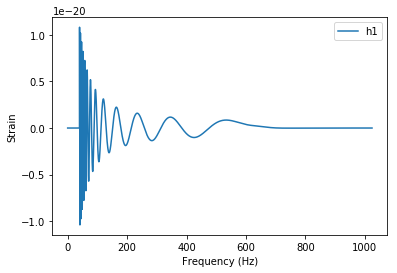

In [23]:
#--------------#Import the packages we need--------------#
import matplotlib.pyplot as plt  # Import figure plot package
from pycbc.waveform import get_fd_waveform # Import the time domain waveform generation function from PyCBC
#--------------------#Import over-----------------------#


#--------------#Generate the time series waveform#--------------#
hp, hc = get_fd_waveform(approximant='IMRPhenomPv2', # Use a Post-Neutonian approximant -- IMRPhenomPv2    
                         mass1=20, 
                         mass2=20,
                         spin1z=0.9,
                         spin2z=0.9,
                         delta_f=1.0/4, # Sample frequency = 4096Hz
                         f_lower=40 # High pass filter
                         )
#--------------#Wavefrom generation over#----------------------#


#----------Plot the time series figure--------------#
plt.plot(hp.sample_frequencies, # X cordinate: Sample time
         hp, # Y cordinate: Amplitude of plus polarization
         label='h1'
         )
plt.ylabel('Strain')
plt.xlabel('Frequency (Hz)')
plt.legend()
plt.show()
#----------------------Plot over------------------------------#